In [1]:
"""Import necessary libraries and the 'DataTransform' class:"""
import pandas as pd
from data_transform import DataTransform
from dataframe_info import DataFrameInfo
from missing_values import Plotter, DataFrameTransform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""Load the dataset"""
loan_data = pd.read_csv('loan_payments.csv')

In [3]:
"""Initialise the 'DataTransform class"""
transformer = DataTransform(loan_data)

In [4]:
"""Transform the required columns to have a category datatype."""
transformer.convert_to_category(['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'term', 'employment_length', ])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,Mar-2014,0.00,NaN,May-2013,NaN,NaN,1,INDIVIDUAL


In [5]:
"""Transform the required columns to have a datetime datatype."""
transformer.convert_to_datetime(['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'])

c:\Users\alviz\OneDrive\Documents\Data Analysis\AI Core\eda_project\exploratory-data-analysis---customer-loans-in-finance236\data_transform.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column_name] = pd.to_datetime(self.df[column_name], errors='coerce')
c:\Users\alviz\OneDrive\Documents\Data Analysis\AI Core\eda_project\exploratory-data-analysis---customer-loans-in-finance236\data_transform.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column_name] = pd.to_datetime(self.df[column_name], errors='coerce')
c:\Users\alviz\OneDrive\Documents\Data Analysis\AI Core\eda_project\exploratory-data-analysis---customer-loans-in-finance236\data_transform.py:17: UserWarning: Could not infer form

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


In [6]:
print(loan_data.dtypes)

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                 category
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                           object
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [7]:
print(loan_data['issue_date'].unique())

<DatetimeArray>
['2021-01-01 00:00:00', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
 '2019-10-01 00:00:00', '2019-09-01 00:00:00', '2019-08-01 00:00:00',
 '2017-12-01 00:00:00', '2017-11-01 00:00:00', '2017-09-01 00:00:00',
 '2017-07-01 00:00:00', '2017-10-01 00:00:00', '2017-08-01 00:00:00',
 '2017-06-01 00:00:00', '2017-05-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-02-01 00:00:00', '2016-10-01 00:00:00',
 '2016-07-01 00:00:00', '2016-06-01 00:00:00', '2016-05-01 00:00:00',
 '2016-02-01 00:00:00', '2016-01-01 00:00:00', '2015-12-01 00:00:00',
 '2015-09-01 00:00:00', '2015-08-01 00:00:00', '2017-01-01 00:00:00',
 '2016-12-01 00:00:00', '2016-11-01 00:00:00', '2016-09-01 00:00:00',
 '2016-08-01 00:00:00', '2016-04-01 00:00:00', '2016-03-01 00:00:00',
 '2015-11-01 00:00:00', '2015-10-01 00:00:00', '2015-07-01 00:00:00',
 '2015-06-01 00:00:00', '2015-02-01 00:00:00', '2015-05-01 00:00:00',
 '2015-04-01 00:00:00', '2014-08-01 00:00:00', '2015-03-01 00:00:00',
 '20

In [8]:
df_info = DataFrameInfo(loan_data)

In [9]:
df_info.describe_columns()
print(df_info.statistical_summary())
print("Median:\n", df_info.get_median())
print("Standard Deviation:\n", df_info.get_standard_deviation())
print("Mean:\n", df_info.get_mean())
print("Distinct Values Count:\n", df_info.count_distinct_values())
print("DataFrame Shape:\n", df_info.get_shape())
print("Null Values Count:\n", df_info.count_null_values())
print("Null Values Percentage:\n", df_info.count_null_values_percentage())

DataFrame Description: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  category      
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership  

In [10]:
plotter = Plotter(loan_data)
transformer = DataFrameTransform(loan_data)

In [11]:
null_counts = transformer.check_nulls()
print(null_counts)

                             null_count  null_percent
id                                    0      0.000000
member_id                             0      0.000000
loan_amount                           0      0.000000
funded_amount                      3007      5.544799
funded_amount_inv                     0      0.000000
term                               4772      8.799395
int_rate                           5169      9.531449
instalment                            0      0.000000
grade                                 0      0.000000
sub_grade                             0      0.000000
employment_length                  2118      3.905515
home_ownership                        0      0.000000
annual_inc                            0      0.000000
verification_status                   0      0.000000
issue_date                            0      0.000000
loan_status                           0      0.000000
payment_plan                          0      0.000000
purpose                     

In [12]:
transformer.drop_columns()
null_counts_after_dropping = transformer.check_nulls()
print(null_counts_after_dropping)

                            null_count  null_percent
id                                   0      0.000000
member_id                            0      0.000000
loan_amount                          0      0.000000
funded_amount                     3007      5.544799
funded_amount_inv                    0      0.000000
term                              4772      8.799395
int_rate                          5169      9.531449
instalment                           0      0.000000
grade                                0      0.000000
sub_grade                            0      0.000000
employment_length                 2118      3.905515
home_ownership                       0      0.000000
annual_inc                           0      0.000000
verification_status                  0      0.000000
issue_date                           0      0.000000
loan_status                          0      0.000000
payment_plan                         0      0.000000
purpose                              0      0.

In [13]:
transformer.impute_nulls()
null_counts_after_imputation = transformer.check_nulls()
print(null_counts_after_imputation)

Imputing term with mode (36 months)
Imputing employment_length with mode (10+ years)
                            null_count  null_percent
id                                   0      0.000000
member_id                            0      0.000000
loan_amount                          0      0.000000
funded_amount                        0      0.000000
funded_amount_inv                    0      0.000000
term                                 0      0.000000
int_rate                             0      0.000000
instalment                           0      0.000000
grade                                0      0.000000
sub_grade                            0      0.000000
employment_length                    0      0.000000
home_ownership                       0      0.000000
annual_inc                           0      0.000000
verification_status                  0      0.000000
issue_date                           0      0.000000
loan_status                          0      0.000000
payment_plan  

In [14]:
skewed_columns = transformer.calculate_skewness(threshold = 1)


In [15]:
best_transformations = transformer.transform_skewed_columns(skewed_columns)
print("Best transformations for each column:")
print(best_transformations)

Could not apply boxcox transformation on id: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on member_id: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on annual_inc: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on delinq_2yrs: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on inq_last_6mths: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on open_accounts: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on out_prncp: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on out_prncp_inv: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on total_payment: 'numpy.ndarray' object has no attribute 'skew'
Could not apply boxcox transformation on total_payment_inv: 'numpy.ndarray' object has no attrib

In [16]:
for column, method in best_transformations.items():
    transformer.df[column] = transformer._transform_column(transformer.df[column], method)


# Visualize skewness after transformation
for column in best_transformations:
    plotter.plot_skewness(column)

In [17]:
# Save transformed DataFrame
transformed_df = transformer.df
transformed_df.to_csv('transformed_data.csv', index=False)

In [18]:
plotter = Plotter(loan_data)
transformer = DataFrameTransform(loan_data)

In [19]:
# Decide whether to remove or transform outliers based on skewness and summary statistics
df_cleaned = transformer.decide_outlier_handling(skewed_columns)

# Re-initialize classes with cleaned DataFrame
plotter_cleaned = Plotter(df_cleaned)

Transforming outliers for column collections_12_mths_ex_med


In [20]:
# Visualize outliers after removal or transformation
# plotter_cleaned.plot_outliers(skewed_columns)


In [21]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


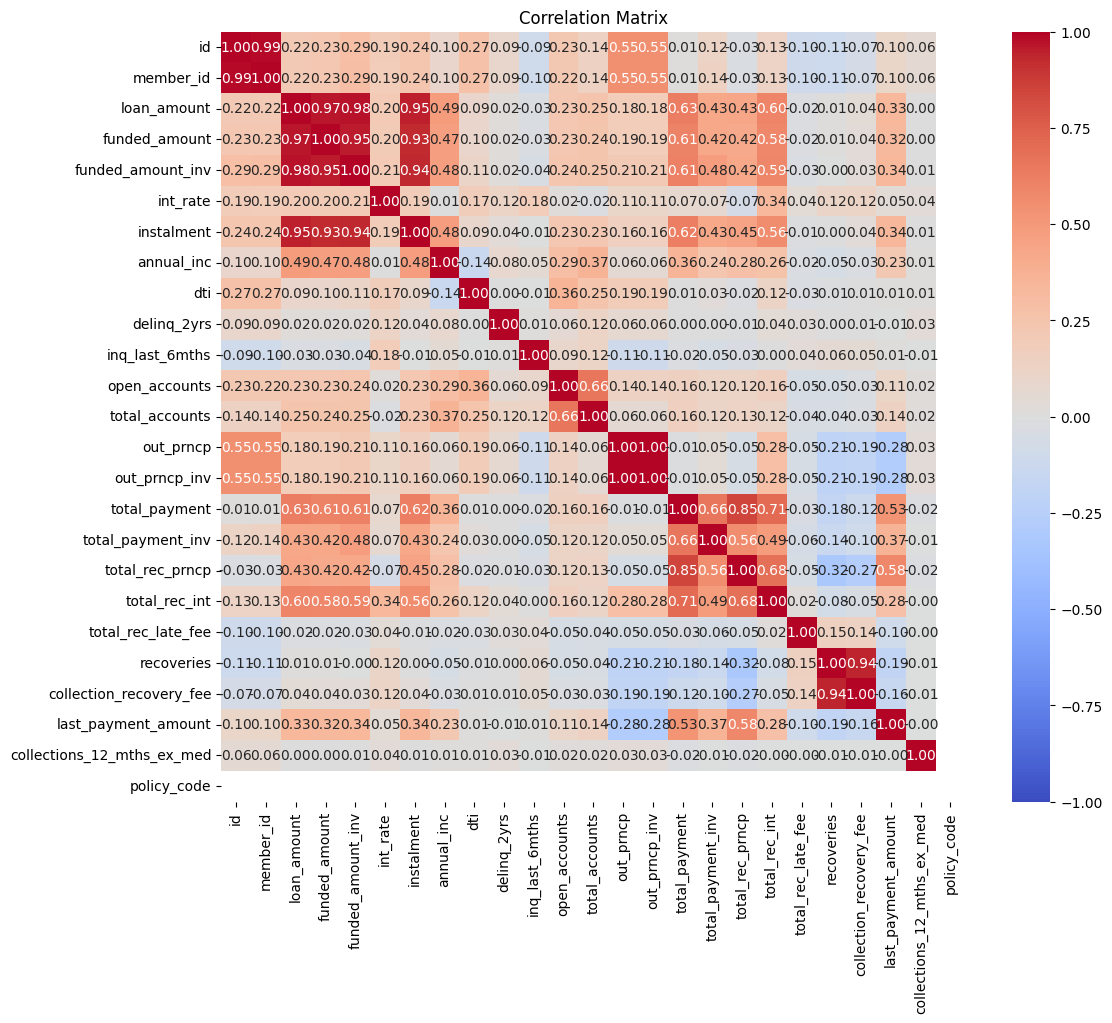

In [22]:
plotter.plot_correlation_matrix()

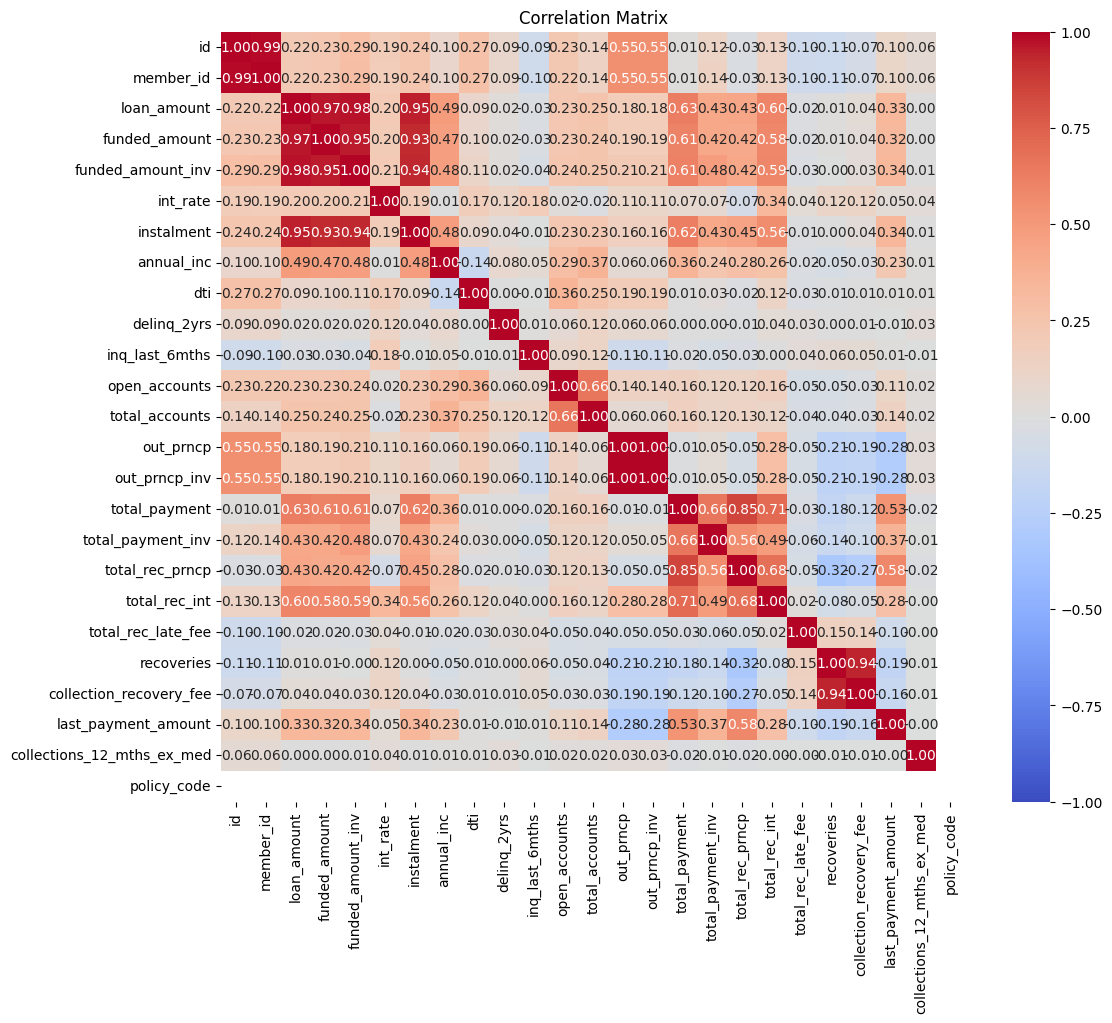

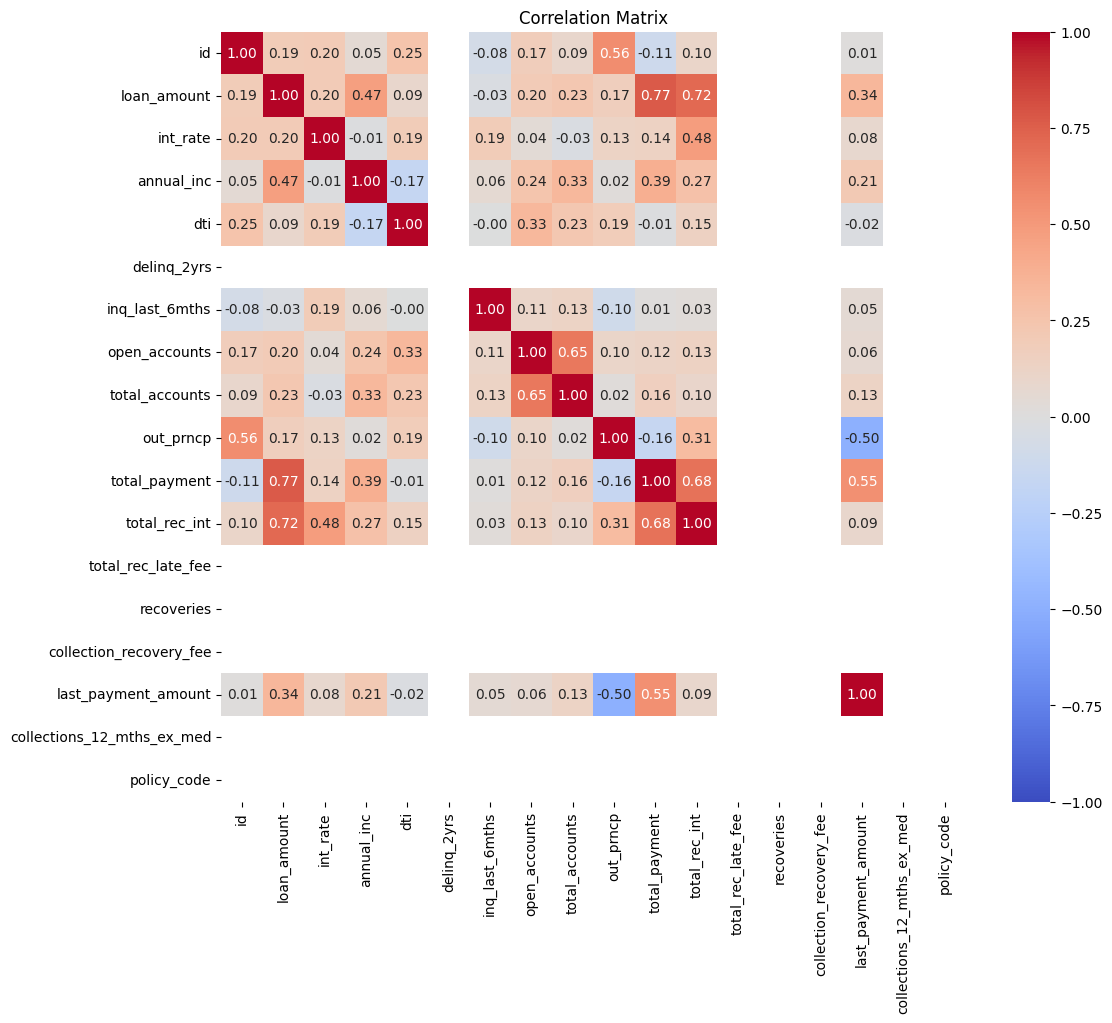

In [24]:
# Step 2: Identify and remove highly correlated columns
highly_correlated_columns = transformer.remove_highly_correlated_columns(threshold=0.9)

# Step 3: Visualize the correlation matrix after removing highly correlated columns
plotter.plot_correlation_matrix()

# Step 3: Create a new Plotter instance with the updated DataFrame
plotter = Plotter(transformer.df)

# Step 4: Visualize the correlation matrix after removing highly correlated columns
plotter.plot_correlation_matrix()